<a href="https://colab.research.google.com/github/edithavalos/react-crud-app/blob/master/ejercicios_pandas_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicios con pandas y sus capacidades de gráficos usando los datos de muestra de Google Colab**

---

**Ejercicio 1:**

Usando el conjunto de datos combinado de `california_housing_train.csv` y `california_housing_test.csv`, crear un gráfico de dispersión (`scatter plot`) de `median_income` vs. `median_house_value` utilizando las capacidades de gráficos de pandas.

---

**Ejercicio 2:**

Con el DataFrame combinado de `california_housing`, crear un histograma de la columna `housing_median_age` usando pandas, y ajustar el número de bins a 20.

---

**Ejercicio 3:**

Usando los datos combinados de `california_housing`, generar un gráfico de barras que muestre el número total de habitaciones (`total_rooms`) por cada nivel de edad mediana de vivienda (`housing_median_age`). Usa el método `plot.bar()` de pandas.

---

**Ejercicio 4:**

Crear un gráfico de caja (`box plot`) de `median_house_value` agrupado por intervalos de ingresos (`median_income`). Divide los ingresos en 5 categorías usando `pd.cut` y luego utiliza pandas para generar el gráfico.

---

**Ejercicio 5:**

Con el conjunto de datos combinado de `mnist_train_small.csv` y `mnist_test.csv`, calcular la cantidad de imágenes por dígito (0-9) y crear un gráfico de pastel (`pie chart`) para mostrar la proporción de cada dígito en el conjunto de datos.

---

**Ejercicio 6:**

Usando el conjunto de datos de `mnist`, crear un gráfico de líneas que muestre el promedio del valor de los píxeles para cada columna (píxel) a través de todas las imágenes del dígito 5.

---

**Ejercicio 7:**

Usando el conjunto de datos de `california_housing`, crear un gráfico de áreas apiladas (`stacked area plot`) que muestre la suma acumulativa de `total_rooms`, `total_bedrooms` y `population` a lo largo de los registros ordenados por `median_income`.

---

**Ejercicio 8:**

Crear un gráfico de densidad (`KDE plot`) de la columna `median_income` usando pandas.

---

**Ejercicio 9:**

Usando pandas, generar una matriz de gráficos de dispersión (`scatter matrix`) para las columnas numéricas del conjunto de datos `california_housing`.

---

**Ejercicio 10:**

Con el conjunto de datos de `california_housing`, crear un gráfico de hexágonos (`hexbin plot`) de `longitude` vs. `latitude` con el valor de `median_house_value` como agregación.

---

Estos ejercicios te ayudarán a practicar el uso de las capacidades de gráficos integradas en pandas, aprovechando los conjuntos de datos de muestra disponibles en Google Colab.

**Ejercicio 1**:

Usando el conjunto de datos combinado de california_housing_train.csv y california_housing_test.csv, crear un gráfico de dispersión (scatter plot) de median_income vs. median_house_value utilizando las capacidades de gráficos de pandas.

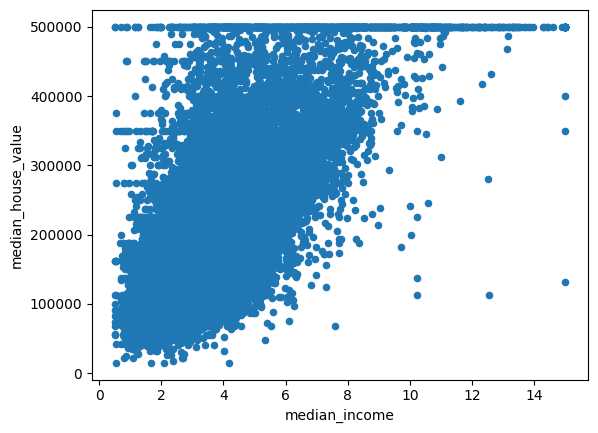

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

housing = pd.read_csv("data/housing.csv")

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(housing, test_size=0.2, random_state=42)

housing.plot.scatter(x='median_income', y='median_house_value')
plt.show()

**Ejercicio 2**:

Con el DataFrame combinado de california_housing, crear un histograma de la columna housing_median_age usando pandas, y ajustar el número de bins a 20.

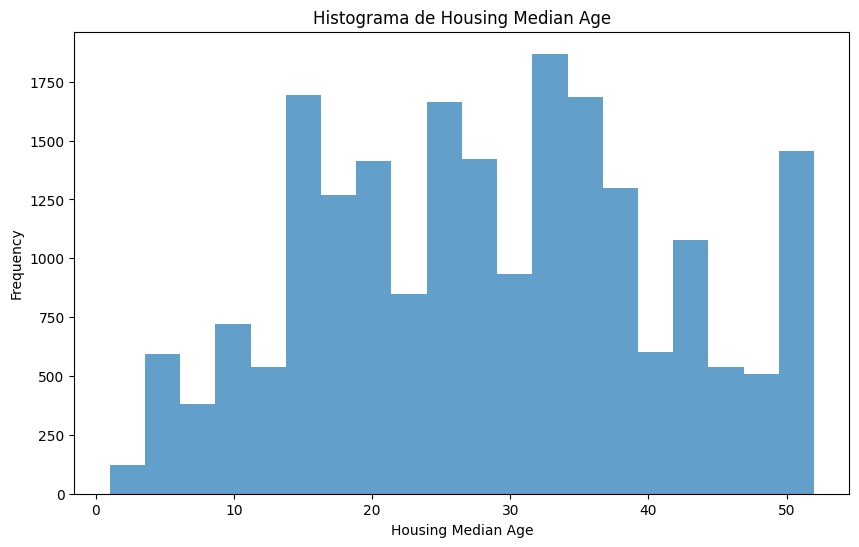

In [16]:
plt.figure(figsize=(10, 6))
housing['housing_median_age'].plot.hist(bins=20, alpha=0.7)
plt.title('Histograma de Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Frequency')
plt.show()


**Ejercicio 3:**

Usando los datos combinados de california_housing, generar un gráfico de barras que muestre el número total de habitaciones (total_rooms) por cada nivel de edad mediana de vivienda (housing_median_age). Usa el método plot.bar() de pandas.

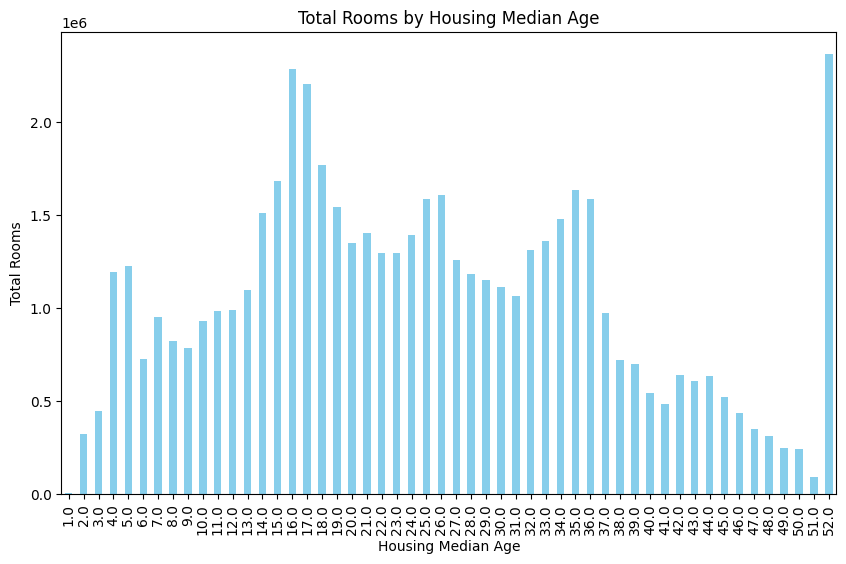

In [17]:
total_rooms_by_age = housing.groupby('housing_median_age')['total_rooms'].sum()
total_rooms_by_age.plot.bar(figsize=(10, 6), color='skyblue')
plt.title('Total Rooms by Housing Median Age')
plt.xlabel('Housing Median Age')
plt.ylabel('Total Rooms')
plt.show()


**Ejercicio 4**:

Crear un gráfico de caja (box plot) de median_house_value agrupado por intervalos de ingresos (median_income). Divide los ingresos en 5 categorías usando pd.cut y luego utiliza pandas para generar el gráfico.

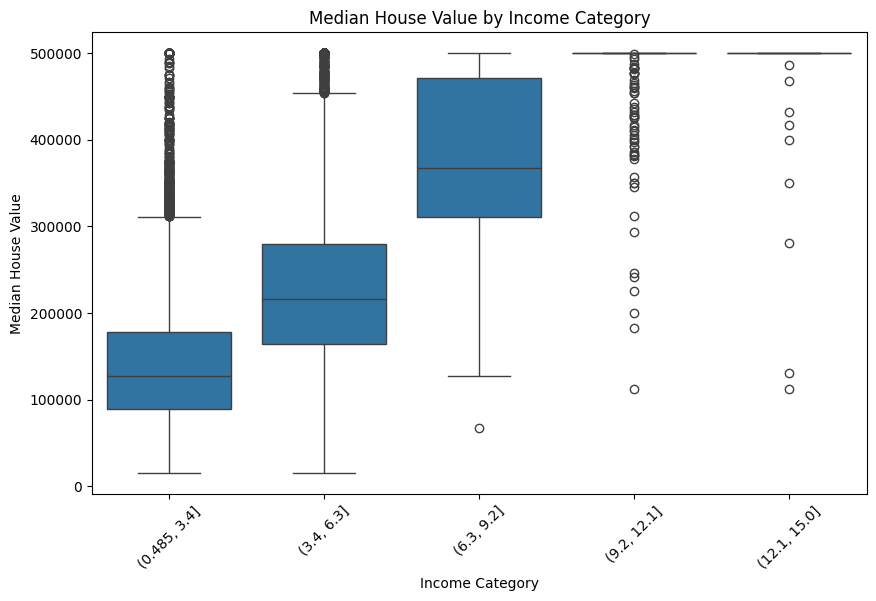

In [14]:
import seaborn as sns

housing['income_category'] = pd.cut(housing['median_income'], bins=5)
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_category', y='median_house_value', data=housing)
plt.title('Median House Value by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


**Ejercicio 5**:

Con el conjunto de datos combinado de mnist_train_small.csv y mnist_test.csv, calcular la cantidad de imágenes por dígito (0-9) y crear un gráfico de pastel (pie chart) para mostrar la proporción de cada dígito en el conjunto de datos.



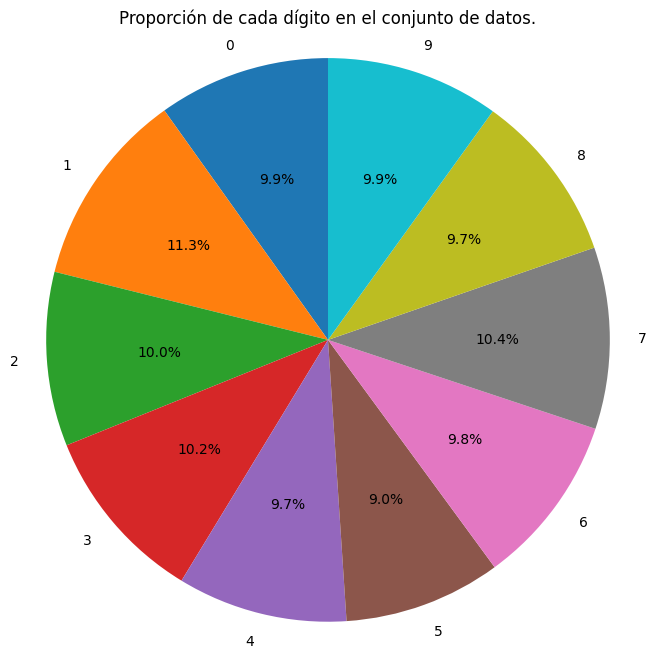

In [26]:
import numpy as np
data = np.load('mnist.npz')
train_images = data['x_train']
train_labels = data['y_train']
test_images = data['x_test']
test_labels = data['y_test']

all_images = np.concatenate((train_images, test_images))
all_labels = np.concatenate((train_labels, test_labels))

digit_counts = np.bincount(all_labels)

plt.figure(figsize=(8, 8))
plt.pie(digit_counts, labels=np.arange(10), autopct='%1.1f%%', startangle=90)
plt.title('Proporción de cada dígito en el conjunto de datos.')
plt.axis('equal')
plt.show()

**Ejercicio 6:**

Usando el conjunto de datos de mnist, crear un gráfico de líneas que muestre el promedio del valor de los píxeles para cada columna (píxel) a través de todas las imágenes del dígito 5.

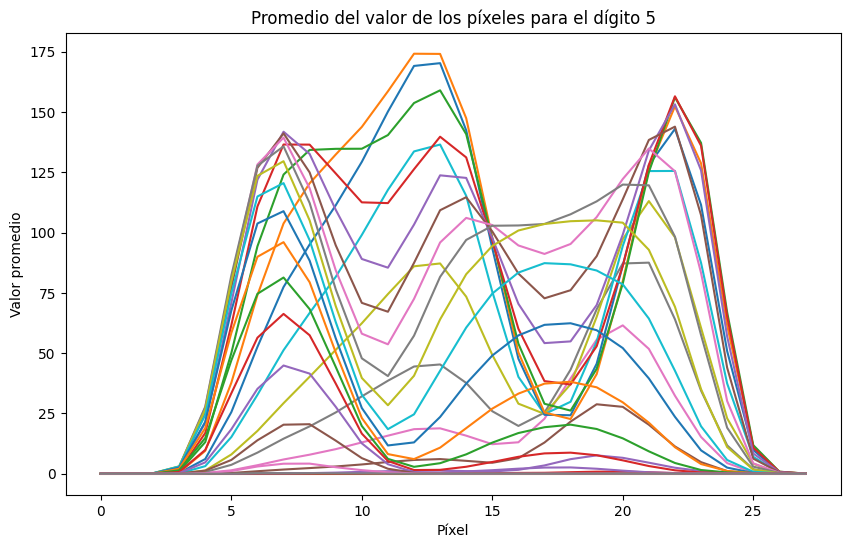

In [30]:
import matplotlib.pyplot as plt

images_5 = all_images[all_labels == 5]

average_pixel_values = np.mean(images_5, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(average_pixel_values)
plt.title('Promedio del valor de los píxeles para el dígito 5')
plt.xlabel('Píxel')
plt.ylabel('Valor promedio')
plt.show()

**Ejercicio 7**:

Usando el conjunto de datos de california_housing, crear un gráfico de áreas apiladas (stacked area plot) que muestre la suma acumulativa de total_rooms, total_bedrooms y population a lo largo de los registros ordenados por median_income.


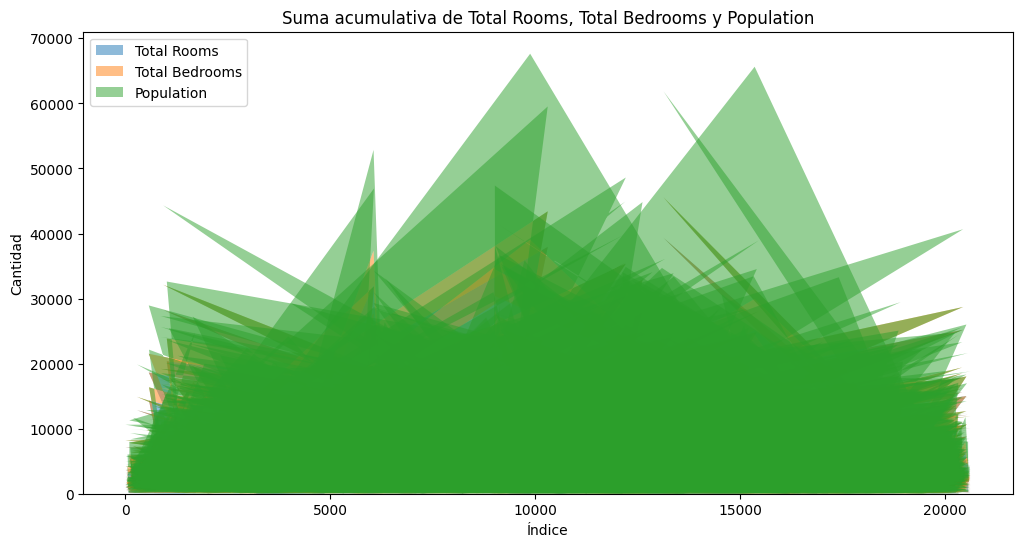

In [31]:
california_housing_sorted = housing.sort_values('median_income')
plt.figure(figsize=(12, 6))
plt.stackplot(california_housing_sorted.index,
               california_housing_sorted['total_rooms'],
               california_housing_sorted['total_bedrooms'],
               california_housing_sorted['population'],
               labels=['Total Rooms', 'Total Bedrooms', 'Population'], alpha=0.5)
plt.title('Suma acumulativa de Total Rooms, Total Bedrooms y Population')
plt.legend(loc='upper left')
plt.xlabel('Índice')
plt.ylabel('Cantidad')
plt.show()


**Ejercicio 8**:

Crear un gráfico de densidad (KDE plot) de la columna median_income usando pandas.

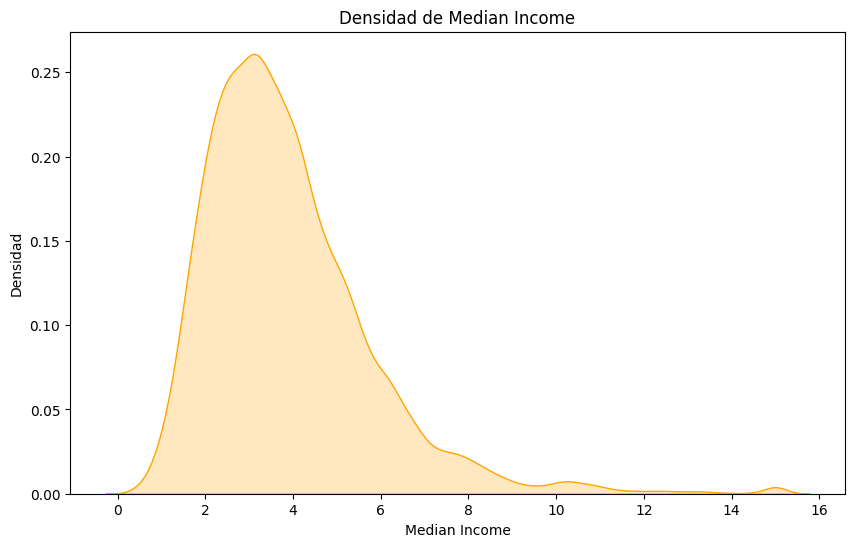

In [32]:
plt.figure(figsize=(10, 6))
sns.kdeplot(housing['median_income'], fill=True, color='orange')
plt.title('Densidad de Median Income')
plt.xlabel('Median Income')
plt.ylabel('Densidad')
plt.show()


**Ejercicio 9**:

Usando pandas, generar una matriz de gráficos de dispersión (scatter matrix) para las columnas numéricas del conjunto de datos california_housing.

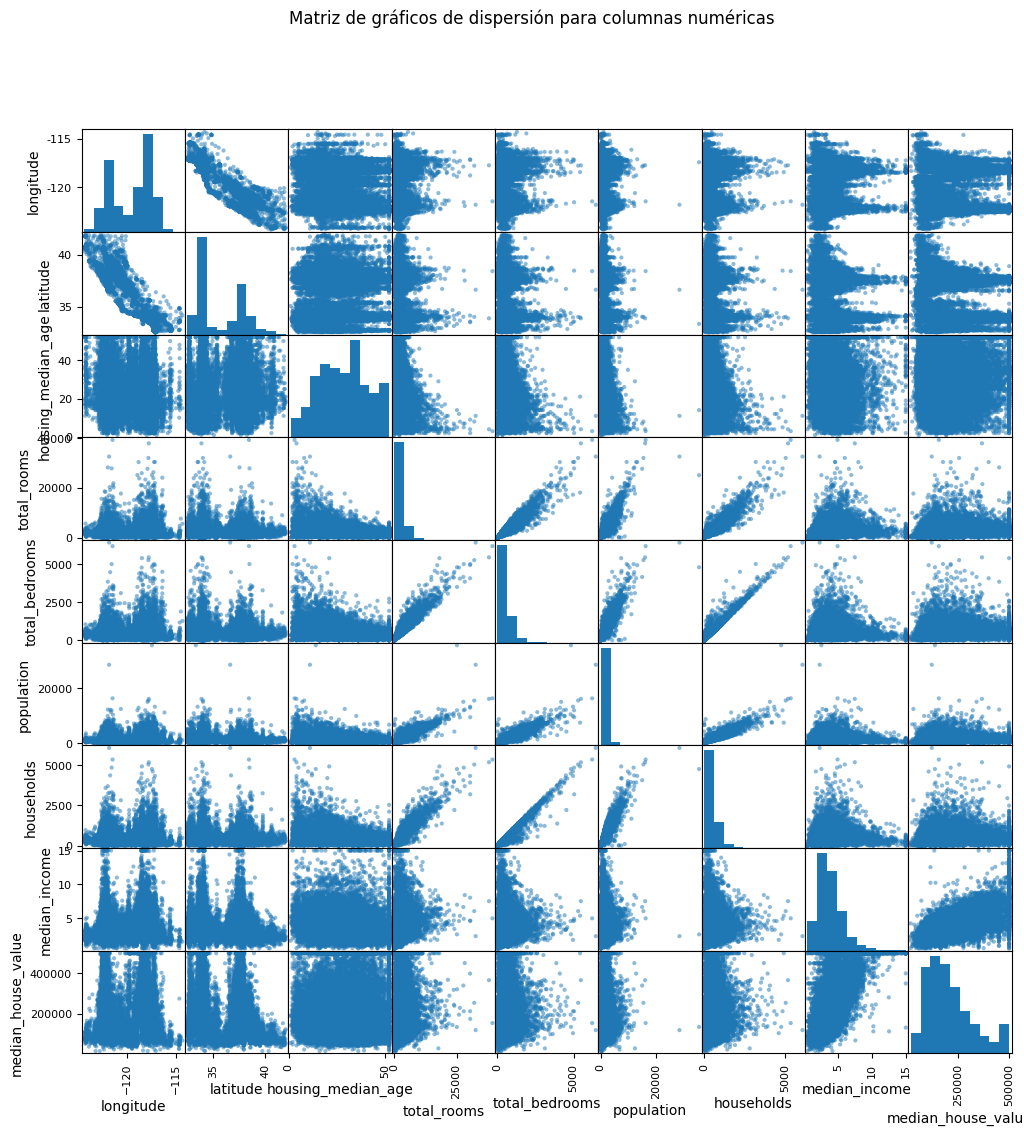

In [33]:
pd.plotting.scatter_matrix(housing.select_dtypes(include=['float64', 'int64']), figsize=(12, 12))
plt.suptitle('Matriz de gráficos de dispersión para columnas numéricas')
plt.show()


**Ejercicio 10:**

Con el conjunto de datos de california_housing, crear un gráfico de hexágonos (hexbin plot) de longitude vs. latitude con el valor de median_house_value como agregación.

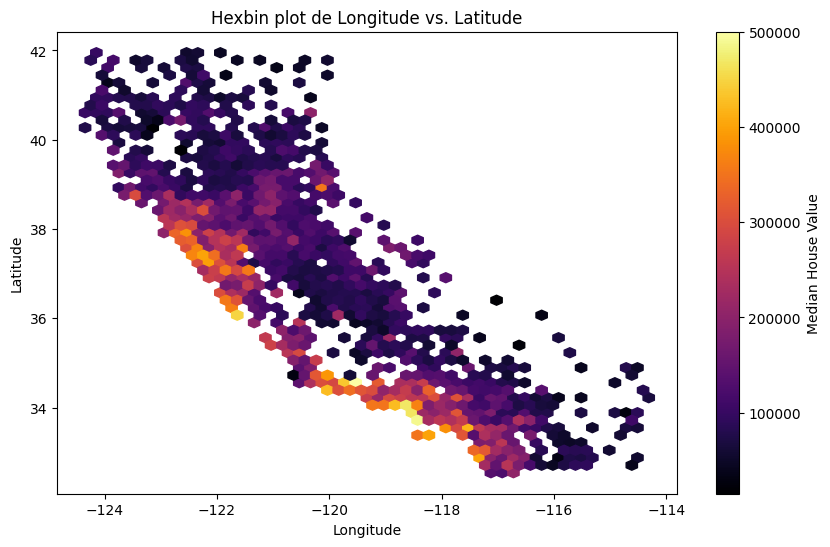

In [34]:
plt.figure(figsize=(10, 6))
plt.hexbin(housing['longitude'], housing['latitude'],
           C=housing['median_house_value'], gridsize=50, cmap='inferno')
plt.colorbar(label='Median House Value')
plt.title('Hexbin plot de Longitude vs. Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
